In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
df = pd.read_csv('covid_symptoms.csv')

In [3]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


**Data Cleaining and Pre Processing**

In [4]:
df.shape

(138532, 9)

In [5]:
df.isna().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     244
head_ache               244
corona_result           244
age_60_and_above        244
gender                 3981
test_indication         244
dtype: int64

In [6]:
df = df.dropna()   #deleting null valued rows

In [7]:
df.shape

(134551, 9)

In [8]:
df.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [9]:
df.dtypes

cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result          float64
age_60_and_above        object
gender                  object
test_indication         object
dtype: object

**Converting categorial data into numerical data**

In [10]:
#age_60_and_above
df = df.replace(to_replace = 'No', value = 0.0)
df = df.replace(to_replace = 'Yes', value = 1.0)

#gender
df = df.replace(to_replace = 'Female', value = 0.0)
df = df.replace(to_replace = 'Male', value = 1.0)

#test_indication
df = df.replace(to_replace = 'Abroad', value = 0.0)
df = df.replace(to_replace = 'Contact with confirmed', value = 1.0)
df = df.replace(to_replace = 'Other', value = 2.0)

In [11]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [12]:
df['corona_result'].value_counts()

corona_result
0.0    98586
1.0    35965
Name: count, dtype: int64

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.450381,0.202148,0.191196,0.223239,0.372618,-0.005152,0.032664,-0.499862
fever,0.450381,1.000000,0.187499,0.197201,0.271006,0.464941,0.051827,0.066999,-0.310493
sore_throat,0.202148,0.187499,1.000000,0.176373,0.313637,0.319475,-0.018291,-0.018881,-0.128966
shortness_of_breath,0.191196,0.197201,0.176373,1.000000,0.194367,0.270694,0.028486,0.005803,-0.100672
head_ache,0.223239,0.271006,0.313637,0.194367,1.000000,0.396552,-0.025940,-0.006076,-0.157776
corona_result,0.372618,0.464941,0.319475,0.270694,0.396552,1.000000,0.047193,0.058379,-0.374010
age_60_and_above,-0.005152,0.051827,-0.018291,0.028486,-0.025940,0.047193,1.000000,-0.016323,0.032239
gender,0.032664,0.066999,-0.018881,0.005803,-0.006076,0.058379,-0.016323,1.000000,-0.023978
test_indication,-0.499862,-0.310493,-0.128966,-0.100672,-0.157776,-0.374010,0.032239,-0.023978,1.000000


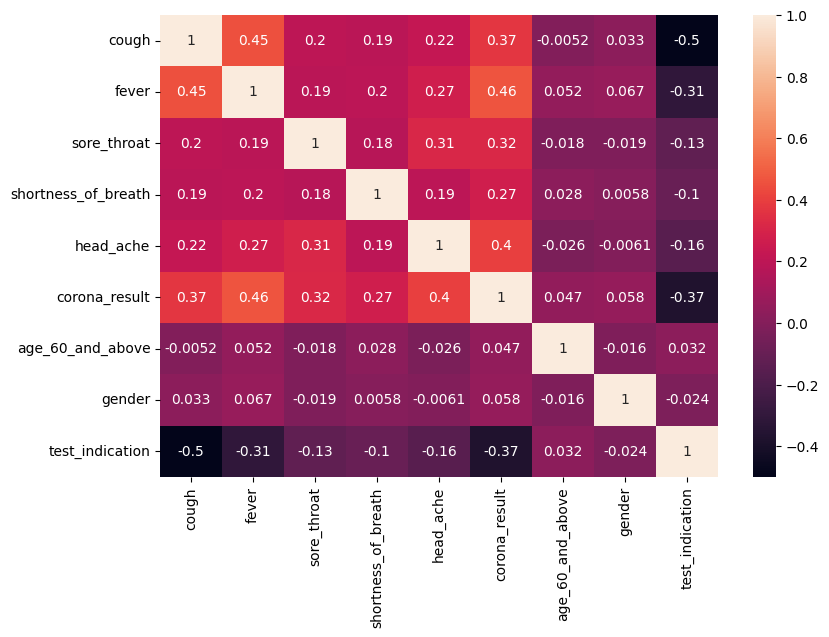

In [13]:
plt.figure(figsize=(9,6))
c=df.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

**Model Training**

In [14]:
features = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication']

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.75)

In [16]:
X_train = train[features]
Y_train = train['corona_result']

X_test = test[features]
Y_test = test['corona_result']

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [29]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [30]:
model.score(X_test, Y_test)

0.9021047624710149

In [20]:
Y_pred = model.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [21]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[23768,   776],
       [ 2517,  6577]])

Text(95.72222222222221, 0.5, 'real')

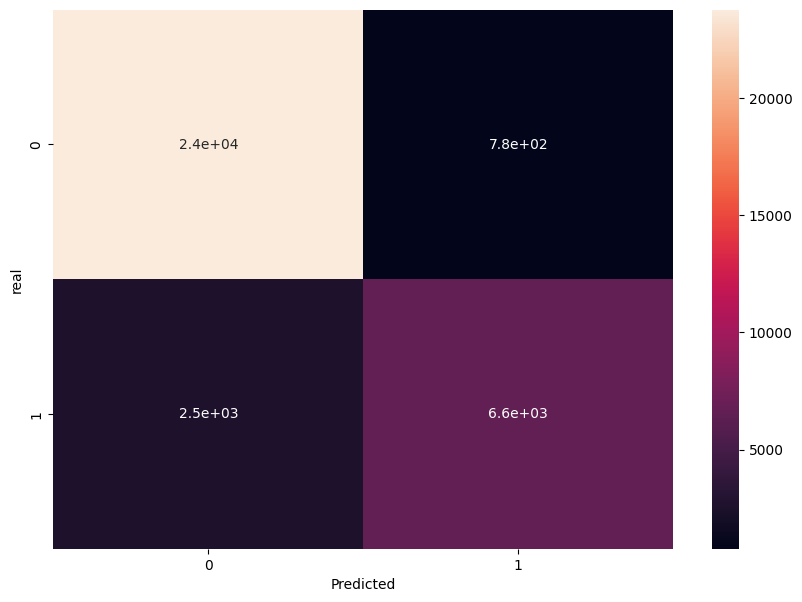

In [22]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [23]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  90.21 %,  30345.0 correct detections
Inaccuracy:  9.79 %,  3293.0 Incorrect detections


In [24]:
df.loc[5]

cough                  1.0
fever                  1.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          1.0
age_60_and_above       1.0
gender                 1.0
test_indication        1.0
Name: 5, dtype: float64

In [25]:
input_data = (1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [1]:
  print("Corona positive")
else:
  print("corona negitive")

Corona positive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import pickle

In [27]:
filename = 'covid_symptoms.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
for columns in df.columns:
  print(columns)

cough
fever
sore_throat
shortness_of_breath
head_ache
corona_result
age_60_and_above
gender
test_indication
